# Spam Email Detection using Naïve Bayes and Gaussian Naïve Bayes

In [21]:
#Libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
#-------------------------------------------SETTING UP AND CLEANING THE DATA------------------------------------


csvFile = pd.read_csv('spam_ham_dataset.csv')


#print(csvFile.shape)
# Checking for missing values using isnull()


df = csvFile.dropna(axis=0, how='any')
#print(df.shape) #dropping no values no issues 

missing_values = df.isnull()

for column in range(3):
    for row in range(5170):
        if missing_values.iloc[row][column] == True:
            print(df.iloc[column])


X = df['text']
y = df['label_num']

#print(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train.shape, X_test.shape)

import spacy

def TextPreprocessing(df, n):
    filtered_sentence = []
    nltk.download('stopwords')
    nltk.download('punkt_tab')


    # Add your own stop words here.
    manual_stop_words = {'subject', ':','','.', ',','/',';','"','-',"'", '(',')','_'}
    #should the following be added: '^', ...


    
    stop_words = set(stopwords.words('english'))
    for i in range(n):
        temp = [] 
        for w in word_tokenize(df.iloc[i].lower()):
            
            if w not in stop_words and w not in manual_stop_words:
                temp.append(w)
        #print(temp)
        filtered_sentence.append(temp)
    #print(filtered_sentence[1:3])
    return filtered_sentence


X_train_token = TextPreprocessing(X_train, X_train.size)
X_test_token = TextPreprocessing(X_test, X_test.size)


#print example if needed to understand the data
print('Token:   ', X_train_token[:2])
print('Training data X(What we are using to predcit):    ', X_train[:2])
print('training data y(what we try to predict)', y_train[:2])

C:\Users\Eric\AppData\Local\Temp\ipykernel_15164\3901763975.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if missing_values.iloc[row][column] == True:
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Token:    [['april', 'activity', 'surveys', 'starting', 'collect', 'data', 'april', 'attached', 'survey', 'drives', 'costs', 'activities', 'commercial', 'teams', 'please', 'select', 'rcs', 'fill', 'driver', 'quantity', 'requested', 'driver', 'month', 'february', 'please', 'fill', 'attached', 'activity', 'driver', 'survey', 'april', 'numbers', 'rc', 'end', 'day', 'thursday', 'may', '4', 'th', 'group', 'currently', 'generates', 'standard', 'report', 'captures', 'surveyed', 'data', 'please', 'send', 'report', 'put', 'recipient', 'list', 'beginning', 'next', 'month', 'eliminate', 'need', 'fill', 'survey', 'every', 'month', 'would', 'like', 'us', 'collect', 'information', 'someone', 'within', 'team', 'beginning', 'next', 'month', 'let', 'know', 'please', 'contact', 'lisa', 'cousino', 'x', '3', '6343', 'unable', 'complete', 'survey', 'within', 'allotted', 'time', 'thanks', 'shari', '3', '3859'], ['message', 'hey', 'julie', '^', '^', 'turned', '18', 'high', 'school', 'senior', 'houston', 'tx'

### Multinomial Naive Bayes

c:\Users\Eric\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       742
           1       1.00      0.72      0.84       293

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035


Confusion Matrix:
[[742   0]
 [ 82 211]]


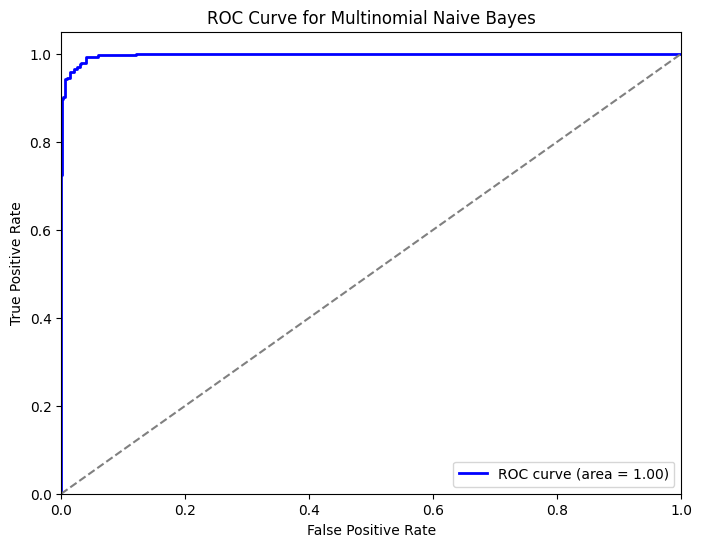

In [19]:
# Convert tokenized text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X_train_vectorized = vectorizer.fit_transform(X_train_token)
X_test_vectorized = vectorizer.transform(X_test_token)

# Initialize Multinomial Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on test data
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
y_prob = nb_classifier.predict_proba(X_test_vectorized)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial Naive Bayes')
plt.legend(loc='lower right')
plt.show()



### Gaussian Naive Bayes 

In [22]:
#converting to array for GNB use
X_train_vectorizedArray = X_train_vectorized.toarray()
X_test_vectorizedArray = X_test_vectorized.toarray()

GNB = GaussianNB()
GNB.fit(X_train_vectorizedArray, y_train)
test = GNB.predict(X_test_vectorizedArray)

#accuracy
accs = accuracy_score(y_test, test)
print()
print(f"Accuracy of GNB = {accs:.2f}")
print()

#confusion matrix
print("confusion matrix - ")
print(confusion_matrix(y_test, test))
print()

#precision, recall, f1=score
print(classification_report(y_test, test))

#setup for roc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

testProbability = GNB.predict_proba(xTestArray)[:, 1]

#creating roc
fPos, tPos, t = roc_curve(y_test, testProbability)
rocAUC = auc(fPos, tPos)

#making/showing graph
plt.figure(figsize=(6, 6))
plt.plot(fPos, tPos, color='red', label=f'ROC graph AUC = {rocAUC:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Gaussian Naive Bayse')
plt.grid(True)
plt.show()


Accuracy of GNB = 0.95

confusion matrix - 
[[725  17]
 [ 35 258]]

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       742
           1       0.94      0.88      0.91       293

    accuracy                           0.95      1035
   macro avg       0.95      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035

